In [1]:
from Bio import SeqIO
import bioframe as bf
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# https://www.ncbi.nlm.nih.gov/genome/?term=Arabidopsis+thaliana
# https://www.ncbi.nlm.nih.gov/genome/4?genome_assembly_id=380024
#!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.fna.gz

In [3]:
#!wget https://www.arabidopsis.org/download_files/Genes/TAIR10_genome_release/TAIR10_chromosome_files/TAIR10_chr_all.fas.gz

In [50]:
genome_path = "genome/Arabidopsis_thaliana.fa.gz"  # ensembl. has too much soft masking. used to be. now a new file.
#genome_path = "GCF_000001735.4_TAIR10.1_genomic.fna.gz"  # refseq
#genome_path = "TAIR10_chr_all.fas.gz"  # arabidopsis.org ;  is not masked

with gzip.open(genome_path, "rt") as handle:
    genome = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))

In [51]:
chr1 = np.array(list(str(genome['1'].seq)))
#chr1 = np.array(list(str(genome['NC_003070.9'].seq)))
#chr1 = np.array(list(str(genome['Chr1'].seq)))

chr1[:10]

array(['C', 'C', 'C', 'T', 'A', 'A', 'A', 'C', 'C', 'C'], dtype='<U1')

In [52]:
np.char.islower(chr1).mean()

0.07099419472492653

In [53]:
a = np.isin(chr1, list("ACGT")).sum()
b = np.isin(chr1, list("acgt")).sum()
a, b, b/(a+b)   # 0.28 in ensembl, 0.22 in refseq, 0.13 in PlantRegMap, 0.07 after filtering

(28103165, 2160147, 0.07137840696352071)

In [40]:
x = np.isin(chr1, list("acgt"))
x

array([ True,  True,  True, ...,  True,  True,  True])

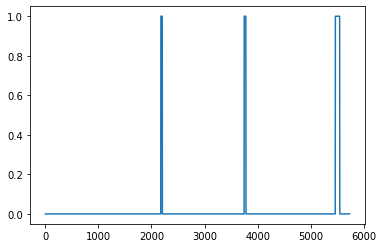

In [41]:
plt.plot(x[148874:154609])

In [17]:
repeats = pd.read_csv("../../data/mlm/repeats.bed.gz", sep="\t").rename(columns=dict(genoName="chrom", genoStart="start", genoEnd="end"))
#repeats = repeats.query('chrom == "Chr1"')
repeats["length"] = repeats.end - repeats.start
repeats

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
0,10,444,191,54,76,Chr1,12582773,12582920,-17844751,-,Helitron1,RC,Helitron,-9953,5856,5713,5,147
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6,803
2,10,2521,72,3,2,Chr1,14676131,14685672,-15741999,-,AR3,Satellite,Satellite,-73,9553,1,6,9541
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8,807
4,11,537,291,44,131,Chr1,18873944,18874466,-11553205,-,Atlantys3_LTR,LTR,Gypsy,-12,482,1,1,522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69340,587,238,156,0,0,ChrM,361356,361401,-5523,-,SSU-rRNA_Ath,rRNA,rRNA,-16,1886,1842,6,45
69341,587,278,263,0,0,ChrM,361523,361599,-5325,-,SSU-rRNA_Ath,rRNA,rRNA,-164,1738,1663,6,76
69342,587,582,289,31,44,ChrM,362179,362407,-4517,-,SSU-rRNA_Ath,rRNA,rRNA,-481,1421,1197,6,228
69343,587,336,258,62,42,ChrM,364854,365016,-1908,+,LSU-rRNA_Ath,rRNA,rRNA,797,961,-2414,6,162


In [7]:
#repeats = bf.merge(repeats)
#repeats

<AxesSubplot:xlabel='count', ylabel='repClass'>

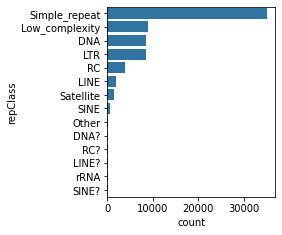

In [15]:
plt.figure(figsize=(3, 3.5))
sns.countplot(repeats, y="repClass", color="C0", order = repeats.repClass.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='repFamily'>

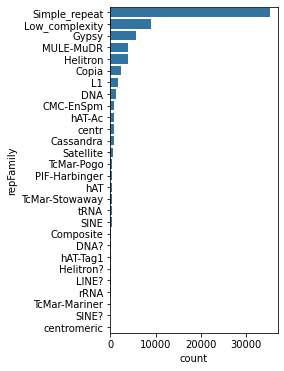

In [13]:
plt.figure(figsize=(3, 6))
sns.countplot(repeats, y="repFamily", color="C0", order=repeats.repFamily.value_counts().index)

<AxesSubplot:xlabel='length', ylabel='repClass'>

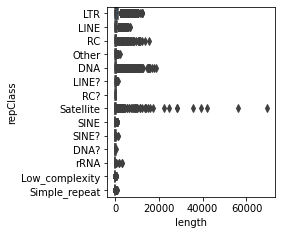

In [23]:
plt.figure(figsize=(3, 3.5))
sns.boxplot(
    data=repeats,
    y="repClass",
    x="length",
    color="C0",
    order=repeats.groupby("repClass").length.median().sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='length', ylabel='repClass'>

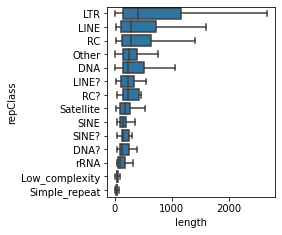

In [24]:
plt.figure(figsize=(3, 3.5))
sns.boxplot(
    data=repeats,
    y="repClass",
    x="length",
    color="C0",
    order=repeats.groupby("repClass").length.median().sort_values(ascending=False).index,
    showfliers=False,
)

<AxesSubplot:xlabel='length', ylabel='repFamily'>

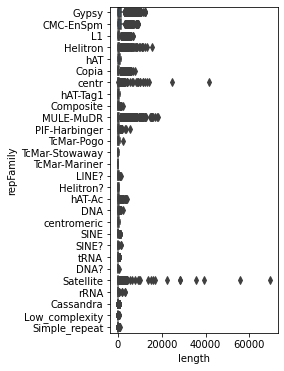

In [25]:
plt.figure(figsize=(3, 6))
sns.boxplot(
    data=repeats,
    y="repFamily",
    x="length",
    color="C0",
    order=repeats.groupby("repFamily").length.median().sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='length', ylabel='repFamily'>

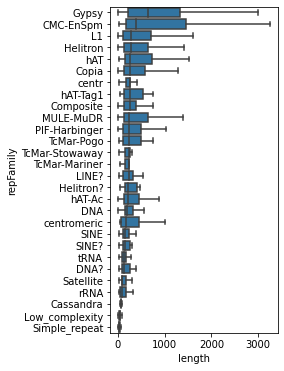

In [26]:
plt.figure(figsize=(3, 6))
sns.boxplot(
    data=repeats,
    y="repFamily",
    x="length",
    color="C0",
    order=repeats.groupby("repFamily").length.median().sort_values(ascending=False).index,
    showfliers=False,
)

<AxesSubplot:xlabel='total_coverage', ylabel='repClass'>

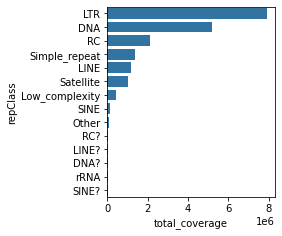

In [17]:
plt.figure(figsize=(3, 3.5))
sns.barplot(
    repeats.groupby("repClass").length.sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={"length": "total_coverage"}),
    y="repClass",
    x="total_coverage",
    color="C0"
)

<AxesSubplot:xlabel='total_coverage', ylabel='repFamily'>

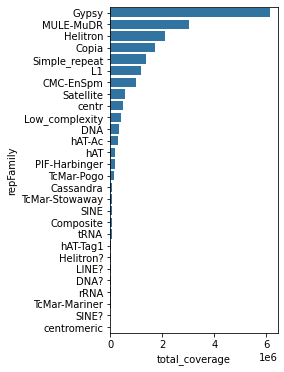

In [18]:
plt.figure(figsize=(3, 6))
sns.barplot(
    repeats.groupby("repFamily").length.sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={"length": "total_coverage"}),
    y="repFamily",
    x="total_coverage",
    color="C0"
)

<AxesSubplot:xlabel='milliDiv', ylabel='repClass'>

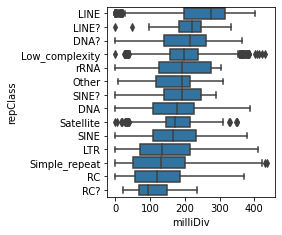

In [22]:
plt.figure(figsize=(3, 3.5))
sns.boxplot(
    data=repeats,
    y="repClass",
    x="milliDiv",
    color="C0",
    order=repeats.groupby("repClass").milliDiv.median().sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='milliDiv', ylabel='repFamily'>

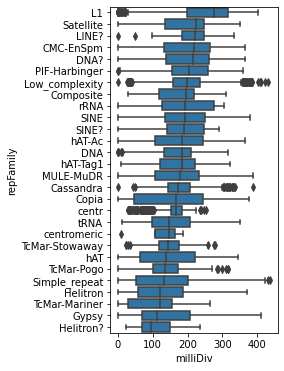

In [21]:
plt.figure(figsize=(3, 6))
sns.boxplot(
    data=repeats,
    y="repFamily",
    x="milliDiv",
    color="C0",
    order=repeats.groupby("repFamily").milliDiv.median().sort_values(ascending=False).index,
)

<AxesSubplot:>

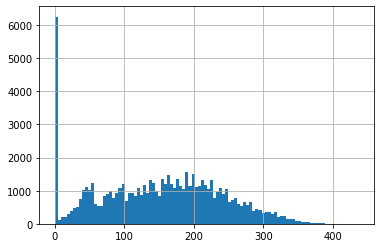

In [27]:
repeats.milliDiv.hist(bins=100)

<AxesSubplot:>

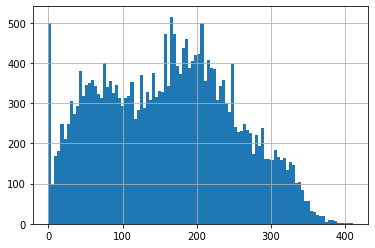

In [28]:
repeats[~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])].milliDiv.hist(bins=100)

In [29]:
(repeats.milliDiv <= 50).mean()

0.17180762852404644

In [30]:
(repeats.milliDiv <= 100).mean()

0.3175859831278391

In [31]:
repeats[repeats.repClass=="Low_complexity"].sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
3301,645,13,0,129,29,Chr1,7906706,7906737,-22520934,+,GA-rich,Low_complexity,Low_complexity,1,34,0,3,31
54783,596,21,27,132,0,Chr5,1500697,1500735,-25474767,+,GA-rich,Low_complexity,Low_complexity,1,43,0,5,38
17055,814,19,28,71,71,Chr1,30048356,30048398,-379273,+,GA-rich,Low_complexity,Low_complexity,1,42,0,1,42
29755,591,16,29,77,50,Chr3,913579,913618,-22546212,+,GA-rich,Low_complexity,Low_complexity,1,40,0,2,39
15344,785,16,29,108,25,Chr1,26293006,26293043,-4134628,+,GA-rich,Low_complexity,Low_complexity,1,40,0,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,685,19,402,0,8,Chr1,13237492,13237613,-17190058,+,GA-rich,Low_complexity,Low_complexity,1,120,0,6,121
16301,801,12,409,0,0,Chr1,28354163,28354240,-2073431,+,A-rich,Low_complexity,Low_complexity,1,77,0,1,77
13197,753,18,412,0,0,Chr1,22128315,22128407,-8299264,+,GA-rich,Low_complexity,Low_complexity,1,92,0,1,92
64291,717,18,421,0,0,Chr5,17389253,17389350,-9586152,+,GA-rich,Low_complexity,Low_complexity,1,97,0,5,97


In [32]:
repeats[repeats.repClass=="Simple_repeat"].sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
52397,698,22,0,0,0,Chr4,14924031,14924055,-3661001,+,(AT)n,Simple_repeat,Simple_repeat,1,24,0,4,24
9043,704,50,0,0,0,Chr1,15641484,15641529,-14786142,+,(AAT)n,Simple_repeat,Simple_repeat,1,45,0,8,45
25006,665,16,0,0,0,Chr2,10569993,10570011,-9128278,+,(T)n,Simple_repeat,Simple_repeat,1,18,0,2,18
65074,727,19,0,0,0,Chr5,18723568,18723589,-8251913,+,(GA)n,Simple_repeat,Simple_repeat,1,21,0,5,21
54040,726,57,0,0,0,Chr4,18572970,18573019,-12037,+,(AG)n,Simple_repeat,Simple_repeat,1,49,0,4,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57619,645,16,418,0,0,Chr5,7979382,7979465,-18996037,+,(TT)n,Simple_repeat,Simple_repeat,1,83,0,5,83
47856,631,255,418,6,35,Chr4,6057317,6057362,-12527694,+,(TGG)n,Simple_repeat,Simple_repeat,2,192,0,4,45
47070,624,12,421,0,0,Chr4,5150436,5150508,-13434548,+,(ATTATT)n,Simple_repeat,Simple_repeat,1,72,0,4,72
4099,659,244,430,6,35,Chr1,9707864,9708040,-20719631,+,(TGG)n,Simple_repeat,Simple_repeat,3,173,0,3,176


In [21]:
repeats[repeats.repClass=="Simple_repeat"].sort_values("length")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
32609,644,15,161,45,22,Chr3,7754999,7755005,-15704825,+,(TTTTTGG)n,Simple_repeat,Simple_repeat,2,45,0,3,6
62864,700,19,130,0,67,Chr5,15130282,15130288,-11845214,+,(ATTTAT)n,Simple_repeat,Simple_repeat,3,45,0,5,6
57452,643,16,220,28,58,Chr5,7664703,7664709,-19310793,+,(ATTATGT)n,Simple_repeat,Simple_repeat,1,66,0,5,6
52476,700,24,216,12,62,Chr4,15153404,15153410,-3431646,+,(TTCT)n,Simple_repeat,Simple_repeat,1,80,0,4,6
1356,610,16,274,41,41,Chr1,3307511,3307517,-27120154,+,(AT)n,Simple_repeat,Simple_repeat,59,73,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,638,429,10,8,2,Chr1,7024927,7025325,-23402346,+,(CTT)n,Simple_repeat,Simple_repeat,1,400,0,2,398
6055,683,91,334,21,16,Chr1,12970950,12971382,-17456289,+,(AAGC)n,Simple_repeat,Simple_repeat,1,434,0,5,432
48484,638,420,117,9,67,Chr4,6953791,6954228,-11630828,+,(CCA)n,Simple_repeat,Simple_repeat,1,411,0,4,437
45905,612,776,3,0,0,Chr4,3655375,3656043,-14929013,+,(AAG)n,Simple_repeat,Simple_repeat,1,668,0,4,668


<AxesSubplot:>

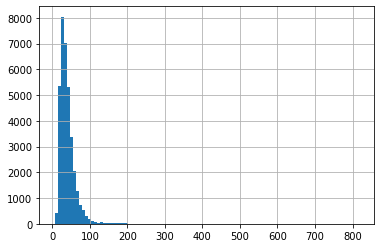

In [23]:
repeats[repeats.repClass=="Simple_repeat"].length.hist(bins=100)

In [70]:
repeats[repeats.repClass=="Simple_repeat"].query('milliDiv >= 50').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
52902,707,13,50,0,45,Chr4,16100161,16100184,-2484872,+,(CTT)n,Simple_repeat,Simple_repeat,1,22,0,4,23
53192,713,14,50,0,0,Chr4,16810487,16810508,-1774548,+,(TCT)n,Simple_repeat,Simple_repeat,1,21,0,4,21
15816,793,14,50,0,0,Chr1,27268342,27268363,-3159308,+,(CTT)n,Simple_repeat,Simple_repeat,1,21,0,1,21
53049,710,14,50,0,0,Chr4,16514351,16514372,-2070684,+,(GAA)n,Simple_repeat,Simple_repeat,1,21,0,4,21
35782,677,12,50,0,45,Chr3,12167043,12167066,-11292764,+,(AAAC)n,Simple_repeat,Simple_repeat,1,22,0,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47856,631,255,418,6,35,Chr4,6057317,6057362,-12527694,+,(TGG)n,Simple_repeat,Simple_repeat,2,192,0,4,45
57619,645,16,418,0,0,Chr5,7979382,7979465,-18996037,+,(TT)n,Simple_repeat,Simple_repeat,1,83,0,5,83
47070,624,12,421,0,0,Chr4,5150436,5150508,-13434548,+,(ATTATT)n,Simple_repeat,Simple_repeat,1,72,0,4,72
4099,659,244,430,6,35,Chr1,9707864,9708040,-20719631,+,(TGG)n,Simple_repeat,Simple_repeat,3,173,0,3,176


In [71]:
repeats[repeats.repClass=="Simple_repeat"].query('milliDiv >= 10').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
2910,638,429,10,8,2,Chr1,7024927,7025325,-23402346,+,(CTT)n,Simple_repeat,Simple_repeat,1,400,0,2,398
20905,620,114,10,9,0,Chr2,4648498,4648603,-15049686,+,(TC)n,Simple_repeat,Simple_repeat,1,106,0,1,105
37878,694,96,11,0,11,Chr3,14305224,14305315,-9154515,+,(TC)n,Simple_repeat,Simple_repeat,1,90,0,3,91
7925,700,95,11,10,10,Chr1,15167987,15168083,-15259588,+,(AAACCCT)n,Simple_repeat,Simple_repeat,1,96,0,7,96
46543,619,209,11,0,0,Chr4,4547833,4548019,-14037037,+,(GA)n,Simple_repeat,Simple_repeat,1,186,0,4,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57619,645,16,418,0,0,Chr5,7979382,7979465,-18996037,+,(TT)n,Simple_repeat,Simple_repeat,1,83,0,5,83
47856,631,255,418,6,35,Chr4,6057317,6057362,-12527694,+,(TGG)n,Simple_repeat,Simple_repeat,2,192,0,4,45
47070,624,12,421,0,0,Chr4,5150436,5150508,-13434548,+,(ATTATT)n,Simple_repeat,Simple_repeat,1,72,0,4,72
4099,659,244,430,6,35,Chr1,9707864,9708040,-20719631,+,(TGG)n,Simple_repeat,Simple_repeat,3,173,0,3,176


In [72]:
repeats[repeats.repClass=="Simple_repeat"].sort_values("length")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
32609,644,15,161,45,22,Chr3,7754999,7755005,-15704825,+,(TTTTTGG)n,Simple_repeat,Simple_repeat,2,45,0,3,6
62864,700,19,130,0,67,Chr5,15130282,15130288,-11845214,+,(ATTTAT)n,Simple_repeat,Simple_repeat,3,45,0,5,6
57452,643,16,220,28,58,Chr5,7664703,7664709,-19310793,+,(ATTATGT)n,Simple_repeat,Simple_repeat,1,66,0,5,6
52476,700,24,216,12,62,Chr4,15153404,15153410,-3431646,+,(TTCT)n,Simple_repeat,Simple_repeat,1,80,0,4,6
1356,610,16,274,41,41,Chr1,3307511,3307517,-27120154,+,(AT)n,Simple_repeat,Simple_repeat,59,73,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,638,429,10,8,2,Chr1,7024927,7025325,-23402346,+,(CTT)n,Simple_repeat,Simple_repeat,1,400,0,2,398
6055,683,91,334,21,16,Chr1,12970950,12971382,-17456289,+,(AAGC)n,Simple_repeat,Simple_repeat,1,434,0,5,432
48484,638,420,117,9,67,Chr4,6953791,6954228,-11630828,+,(CCA)n,Simple_repeat,Simple_repeat,1,411,0,4,437
45905,612,776,3,0,0,Chr4,3655375,3656043,-14929013,+,(AAG)n,Simple_repeat,Simple_repeat,1,668,0,4,668


<AxesSubplot:>

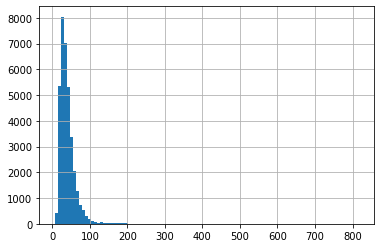

In [74]:
repeats[repeats.repClass=="Simple_repeat"].length.hist(bins=100)

In [78]:
repeats.query('repClass=="Satellite"').repFamily.value_counts()

centr        752
Satellite    595
Name: repFamily, dtype: int64

In [80]:
repeats.sort_values("start")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
33,585,282,132,0,81,Chr1,0,107,-30427564,-,ATREP18,DNA,DNA,-1142,649,561,1,107
54079,585,21,232,0,32,Chr5,10,74,-26975428,+,(ACCCTAA)n,Simple_repeat,Simple_repeat,1,62,0,4,64
69249,585,704,266,81,23,ChrM,76,546,-366378,-,ATCopia52_I-int,LTR,Copia,-1426,3061,2489,6,470
29375,585,66,15,0,29,Chr3,100,172,-23459658,+,(CCCTAAA)n,Simple_repeat,Simple_repeat,1,70,0,2,72
69155,585,20,226,0,0,ChrC,111,153,-154325,+,A-rich,Low_complexity,Low_complexity,1,42,0,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,817,18,175,0,0,Chr1,30420419,30420451,-7220,+,(AT)n,Simple_repeat,Simple_repeat,1,32,0,1,32
17243,817,12,43,83,0,Chr1,30421948,30421972,-5699,+,(TGTTG)n,Simple_repeat,Simple_repeat,1,26,0,1,24
17244,817,19,128,75,18,Chr1,30422420,30422473,-5198,+,(CTTCTT)n,Simple_repeat,Simple_repeat,1,56,0,1,53
17245,817,12,259,0,24,Chr1,30424200,30424243,-3428,+,A-rich,Low_complexity,Low_complexity,1,42,0,1,43


In [75]:
repeats[repeats.repClass=="Simple_repeat"].query('length >= 30').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
62845,700,62,0,0,0,Chr5,15111690,15111743,-11863759,+,(TA)n,Simple_repeat,Simple_repeat,1,53,0,5,53
63735,710,34,0,0,0,Chr5,16477617,16477648,-10497854,+,(TCT)n,Simple_repeat,Simple_repeat,1,31,0,5,31
25410,671,40,0,26,0,Chr2,11338042,11338080,-8360209,+,(TA)n,Simple_repeat,Simple_repeat,1,39,0,2,38
65218,730,17,0,31,65,Chr5,19029936,19029968,-7945534,+,(AAAAC)n,Simple_repeat,Simple_repeat,1,31,0,5,32
49836,656,57,0,0,0,Chr4,9362629,9362678,-9222378,+,(GA)n,Simple_repeat,Simple_repeat,1,49,0,4,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57619,645,16,418,0,0,Chr5,7979382,7979465,-18996037,+,(TT)n,Simple_repeat,Simple_repeat,1,83,0,5,83
47856,631,255,418,6,35,Chr4,6057317,6057362,-12527694,+,(TGG)n,Simple_repeat,Simple_repeat,2,192,0,4,45
47070,624,12,421,0,0,Chr4,5150436,5150508,-13434548,+,(ATTATT)n,Simple_repeat,Simple_repeat,1,72,0,4,72
4099,659,244,430,6,35,Chr1,9707864,9708040,-20719631,+,(TGG)n,Simple_repeat,Simple_repeat,3,173,0,3,176


In [40]:
bf.merge(repeats).apply(lambda row: row.end-row.start, axis=1).sum()

19413455

In [65]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 50)]).apply(lambda row: row.end-row.start, axis=1).sum() / 1000000

5.567172

In [67]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 100)]).apply(lambda row: row.end-row.start, axis=1).sum() / 1000000

10.108765

In [68]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity"])) & (repeats.milliDiv <= 50)]).apply(lambda row: row.end-row.start, axis=1).sum() / 1000000

5.801969

In [69]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity"])) & (repeats.milliDiv <= 100)]).apply(lambda row: row.end-row.start, axis=1).sum() / 1000000

10.511926

In [47]:
repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 50)]

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6,31
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8,99
10,85,131959,15,5,3,Chr1,12713487,12728541,-17699130,+,Vandal2,DNA,MULE-MuDR,1,15072,-181,5,23
11,85,20809,36,29,1,Chr1,12842883,12845445,-17582226,+,ATCopia36_I-int,LTR,Copia,1548,4180,0,5,66
15,87,66810,40,6,0,Chr1,14807627,14815548,-15612123,+,Athila6B_I-int,LTR,Gypsy,1,7963,0,6,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69248,586,313,26,0,0,ChrC,152355,152394,-2084,+,Atlantys3_I-int,LTR,Gypsy,4853,4891,-4777,6,26
69263,585,543,0,0,0,ChrM,47742,47800,-319124,-,ATREP12,RC,Helitron,-983,359,302,6,0
69265,585,291,0,0,0,ChrM,51162,51194,-315730,-,ATREP12,RC,Helitron,-953,389,358,6,0
69285,586,298,0,0,0,ChrM,135420,135454,-231470,-,Athila7_I-int,LTR,Gypsy,-9174,814,781,6,0


In [46]:
repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 100)]

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6,31
2,10,2521,72,3,2,Chr1,14676131,14685672,-15741999,-,AR3,Satellite,Satellite,-73,9553,1,6,77
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8,99
10,85,131959,15,5,3,Chr1,12713487,12728541,-17699130,+,Vandal2,DNA,MULE-MuDR,1,15072,-181,5,23
11,85,20809,36,29,1,Chr1,12842883,12845445,-17582226,+,ATCopia36_I-int,LTR,Copia,1548,4180,0,5,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69265,585,291,0,0,0,ChrM,51162,51194,-315730,-,ATREP12,RC,Helitron,-953,389,358,6,0
69285,586,298,0,0,0,ChrM,135420,135454,-231470,-,Athila7_I-int,LTR,Gypsy,-9174,814,781,6,0
69289,586,248,88,0,87,ChrM,143883,143933,-222991,+,ATSAT5,Satellite,Satellite,880,925,-1271,6,175
69291,586,543,0,0,0,ChrM,181907,181965,-184959,-,ATREP12,RC,Helitron,-983,359,302,6,0


In [35]:
repeats.query('repFamily == "Gypsy"').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
8974,703,58216,0,0,0,Chr1,15573085,15579302,-14848369,+,ATGP10_I-int,LTR,Gypsy,1,6217,0,8,6217
44049,597,15900,0,0,0,Chr4,1684996,1686740,-16898316,-,Athila2_LTR,LTR,Gypsy,0,1744,1,4,1744
30974,614,3479,0,0,0,Chr3,3812259,3812643,-19647187,-,ATGP3B_LTR,LTR,Gypsy,0,384,1,2,384
20146,613,85054,0,0,0,Chr2,3753025,3762693,-15935596,-,Atlantys3_I-int,LTR,Gypsy,0,9668,1,1,9668
30973,614,41915,0,0,0,Chr3,3807689,3812259,-19647571,-,ATGP3B_I-int,LTR,Gypsy,0,4570,1,2,4570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22640,636,363,386,19,21,Chr2,6718415,6718946,-12979343,+,Atlantys3_I-int,LTR,Gypsy,576,1105,-8563,2,531
60153,672,518,388,15,13,Chr5,11529432,11529821,-15445681,+,Atlantys1_I-int,LTR,Gypsy,1954,2343,-6968,5,389
11479,729,321,398,11,11,Chr1,18968803,18969243,-11458428,-,TAT1_ATH_I-int,LTR,Gypsy,-6931,2380,1941,1,440
60772,680,527,400,0,0,Chr5,12573153,12573543,-14401959,+,Atlantys1_I-int,LTR,Gypsy,1954,2343,-6968,5,390


In [36]:
repeats.query('repFamily == "Satellite"').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
54115,585,279,0,0,0,Chr5,64015,64047,-26911455,-,ATENSAT1,Satellite,Satellite,-1088,861,830,4,32
62257,694,19112,7,1,1,Chr5,14323384,14379335,-12596167,+,ATSAT5,Satellite,Satellite,1,55923,0,5,55951
59923,670,5822,16,1,0,Chr5,11228858,11268168,-15707334,+,ATSAA5,Satellite,Satellite,1,39317,0,5,39310
43070,74,17018,20,6,2,Chr4,1698911,1706558,-16878498,-,ATENSAT1,Satellite,Satellite,-41,43672,35976,4,7647
44053,598,17018,20,6,2,Chr4,1706647,1742384,-16842672,-,ATENSAT1,Satellite,Satellite,-41,35975,1,4,35737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66614,751,324,326,0,51,Chr5,21813504,21813711,-5161791,-,ATSAT5,Satellite,Satellite,-626,1570,1374,6,207
66697,752,306,330,5,38,Chr5,21938984,21939173,-5036329,-,ATSAT5,Satellite,Satellite,-640,1556,1374,6,189
66698,752,303,348,0,35,Chr5,21939249,21939425,-5036077,-,ATSAT5,Satellite,Satellite,-641,1555,1386,6,176
66615,751,304,350,0,44,Chr5,21813769,21813984,-5161518,-,ATSAT5,Satellite,Satellite,-626,1570,1365,6,215


In [37]:
repeats.query('repFamily == "centr"').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
36976,688,1284,28,6,6,Chr3,13589816,13592604,-9867226,-,COLAR12,Satellite,centr,-58,2788,1,3,2788
9124,705,541,29,0,0,Chr1,15731634,15731703,-14695968,-,COLAR12,Satellite,centr,0,178,110,8,69
20441,616,1316,29,4,4,Chr2,4130318,4130561,-15567728,+,COLAR12,Satellite,centr,1,243,0,1,243
20040,612,1358,32,8,6,Chr2,3617944,3626544,-16071745,-,COLAR12,Satellite,centr,-17,8612,1,1,8600
20038,612,1347,33,9,8,Chr2,3614916,3615552,-16082737,-,COLAR12,Satellite,centr,-61,637,1,1,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,700,238,235,24,24,Chr1,15113621,15113704,-15313967,+,COLAR12,Satellite,centr,87,169,-9,7,83
45419,609,518,239,6,6,Chr4,3225842,3226002,-15359054,+,COLAR12,Satellite,centr,19,178,0,4,160
45577,609,229,239,0,0,Chr4,3258191,3258262,-15326794,+,COLAR12,Satellite,centr,108,178,0,4,71
45375,609,551,247,6,6,Chr4,3217455,3217630,-15367426,+,COLAR12,Satellite,centr,4,178,0,4,175


In [ ]:
repeats.query('repFamily == "centr"').sort_values("milliDiv")

In [81]:
repeats.query('length >= 1000 and milliDiv >= 100').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
60570,678,9357,100,18,5,Chr5,12300587,12302009,-14673493,-,Vandal4,DNA,MULE-MuDR,-17047,1445,6,5,1422
19637,607,8404,100,2,1,Chr2,2962966,2964188,-16734101,+,ATLINE1A,LINE,L1,1031,2254,0,1,1222
59393,665,22755,100,16,6,Chr5,10604754,10608020,-16367482,-,Vandal9,DNA,MULE-MuDR,-7921,4475,1174,5,3266
37509,691,5778,100,32,28,Chr3,13945431,13946449,-9513381,-,Athila4D_LTR,LTR,Gypsy,0,1165,144,3,1018
46448,618,11134,100,23,1,Chr4,4420356,4422012,-14163044,+,Athila3_I-int,LTR,Gypsy,1779,3470,-3940,4,1656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36518,684,1492,360,23,20,Chr3,13029262,13030381,-10429449,+,Atlantys3_I-int,LTR,Gypsy,3329,4451,-5217,3,1119
36564,684,1914,362,23,16,Chr3,13082039,13083315,-10376515,+,ATGP4_I-int,LTR,Gypsy,2115,3399,-1501,3,1276
34438,667,1770,362,24,23,Chr3,10768580,10770221,-12689609,-,TA11,LINE,L1,-1384,4592,2951,3,1641
48941,643,1508,365,7,16,Chr4,7644668,7645747,-10939309,-,ATHAT3,DNA,hAT-Ac,-1409,2775,1706,4,1079


In [18]:
repeats.query('length >= 512 and milliDiv >= 100').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
60012,671,28592,100,10,5,Chr5,11345328,11350404,-15625098,-,Atlantys1_I-int,LTR,Gypsy,-2432,8201,3053,5,5076
10496,716,5430,100,9,17,Chr1,17267054,17268171,-13159500,+,SIMPLEHAT1,DNA,hAT,1,1059,0,9,1117
34552,668,5264,100,64,12,Chr3,10905318,10906318,-12553512,+,ATREP11,RC,Helitron,1,1051,-2,3,1000
19637,607,8404,100,2,1,Chr2,2962966,2964188,-16734101,+,ATLINE1A,LINE,L1,1031,2254,0,1,1222
61238,684,11195,100,3,1,Chr5,13034074,13035624,-13939878,+,Athila0_I-int,LTR,Gypsy,1919,3470,-3940,5,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36618,685,668,375,21,20,Chr3,13151378,13151990,-10307840,-,Atlantys1_I-int,LTR,Gypsy,-1947,1223,611,3,612
59298,664,595,385,24,8,Chr5,10470826,10471407,-16504095,-,ATLINE1_11,LINE,L1,-1466,4058,3469,5,581
22640,636,363,386,19,21,Chr2,6718415,6718946,-12979343,+,Atlantys3_I-int,LTR,Gypsy,576,1105,-8563,2,531
17519,587,407,389,15,15,Chr2,377779,378447,-19319842,-,ATLINE1_7,LINE,L1,-4708,883,216,1,668


In [20]:
repeats.query('length == 1000 and milliDiv >= 100').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
34552,668,5264,100,64,12,Chr3,10905318,10906318,-12553512,+,ATREP11,RC,Helitron,1,1051,-2,3,1000
60283,674,5310,104,33,33,Chr5,11763870,11764870,-15210632,-,Athila5_LTR,LTR,Gypsy,0,1623,624,5,1000
5154,673,4959,119,5,69,Chr1,11647913,11648913,-18778758,+,ATREP7,RC,Helitron,1,940,0,5,1000


In [59]:
bf.merge(bf.expand(repeats.query('repFamily == "centr"'), 30000))

,chrom,start,end,n_intervals
0,Chr1,14332267,14612174,13
1,Chr1,15051902,15468174,501
2,Chr1,15495003,15555404,1
3,Chr1,15556934,15631342,5
4,Chr1,15660047,15778057,4
5,Chr1,17460706,17520870,1
6,Chr2,3572468,3758277,13
7,Chr2,4099360,4160561,2
8,Chr2,11273213,11333492,1
9,Chr3,12641923,12703663,2


In [39]:
repeats.query('repName == "ATREP18"').sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
37542,691,372,20,0,0,Chr3,13979496,13979546,-9480284,+,ATREP18,DNA,DNA,748,797,-994,3,50
3980,656,492,41,0,108,Chr1,9422395,9422477,-21005194,+,ATREP18,DNA,DNA,748,821,-970,3,82
46300,617,1799,43,138,0,Chr4,4218898,4218990,-14366066,+,ATREP18,DNA,DNA,1372,1451,-340,4,92
9638,709,6637,49,18,10,Chr1,16292255,16292969,-14134702,+,ATREP18,DNA,DNA,1,653,-1138,8,714
39609,709,2640,49,0,23,Chr3,16356370,16356727,-7103103,-,ATREP18,DNA,DNA,-695,1096,748,3,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,700,357,250,19,9,Chr1,15197810,15198024,-15229647,-,ATREP18,DNA,DNA,-314,1477,1262,7,214
7620,700,233,250,6,36,Chr1,15095794,15095964,-15331707,-,ATREP18,DNA,DNA,-314,1477,1313,7,170
8864,702,309,252,7,0,Chr1,15431687,15431826,-14995845,-,ATREP18,DNA,DNA,-314,1477,1338,8,139
7995,700,352,261,14,9,Chr1,15195701,15195914,-15231757,-,ATREP18,DNA,DNA,-314,1477,1264,7,213


In [44]:
variants = pd.read_parquet("../vep/variants/filt.Chr5.parquet")
variants["chrom"] = variants.chromosome
variants["start"] = variants.pos
variants["end"] = variants.start + 1
variants

,chromosome,pos,ref,alt,AC,AN,closest_TSS,dist_to_TSS,consequence,chrom,start,end
0,Chr5,500,C,T,376,2078,AT5G01010.2,4494,downstream_gene_variant,Chr5,500,501
1,Chr5,504,T,C,2,2088,AT5G01010.2,4490,intergenic_variant,Chr5,504,505
2,Chr5,505,A,G,4,2110,AT5G01010.2,4489,intergenic_variant,Chr5,505,506
3,Chr5,510,G,A,6,2122,AT5G01010.2,4484,intergenic_variant,Chr5,510,511
4,Chr5,512,A,G,2,2126,AT5G01010.2,4482,intergenic_variant,Chr5,512,513
...,...,...,...,...,...,...,...,...,...,...,...,...
1444080,Chr5,26974897,C,T,6,2074,AT5G67640.1,-4256,intergenic_variant,Chr5,26974897,26974898
1444081,Chr5,26974907,G,A,2,2050,AT5G67640.1,-4266,intergenic_variant,Chr5,26974907,26974908
1444082,Chr5,26974913,C,T,6,2042,AT5G67640.1,-4272,intergenic_variant,Chr5,26974913,26974914
1444083,Chr5,26974918,C,T,4,2044,AT5G67640.1,-4277,intergenic_variant,Chr5,26974918,26974919


In [43]:
repeats = repeats[repeats.chrom=="Chr5"]
repeats

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length
54049,10,5820,34,4,1,Chr5,12582862,12583548,-14391954,+,ATCopia28_I-int,LTR,Copia,4019,4706,0,5,686
54050,10,636,309,61,82,Chr5,14679692,14680605,-12294897,-,ATMU1,DNA,MULE-MuDR,-2610,2319,902,5,913
54051,77,16502,18,0,1,Chr5,5111367,5113250,-21862252,+,ATMU12,DNA,MULE-MuDR,1,1882,-2465,5,1883
54052,78,16,132,0,0,Chr5,6160375,6160400,-20815102,+,(T)n,Simple_repeat,Simple_repeat,1,25,0,5,25
54053,81,19,219,24,74,Chr5,9043941,9044026,-17931476,+,GA-rich,Low_complexity,Low_complexity,1,81,0,5,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69150,790,18,171,42,20,Chr5,26965927,26965975,-9527,+,GA-rich,Low_complexity,Low_complexity,1,49,0,6,48
69151,790,22,0,0,0,Chr5,26966363,26966387,-9115,+,(T)n,Simple_repeat,Simple_repeat,1,24,0,6,24
69152,790,15,55,0,0,Chr5,26970597,26970616,-4886,+,(T)n,Simple_repeat,Simple_repeat,1,19,0,6,19
69153,790,12,218,27,0,Chr5,26971035,26971072,-4430,+,A-rich,Low_complexity,Low_complexity,1,38,0,6,37


In [45]:
repeats = bf.coverage(repeats, variants)
repeats

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,length,coverage
0,10,5820,34,4,1,Chr5,12582862,12583548,-14391954,+,ATCopia28_I-int,LTR,Copia,4019,4706,0,5,686,0
1,10,636,309,61,82,Chr5,14679692,14680605,-12294897,-,ATMU1,DNA,MULE-MuDR,-2610,2319,902,5,913,132
2,77,16502,18,0,1,Chr5,5111367,5113250,-21862252,+,ATMU12,DNA,MULE-MuDR,1,1882,-2465,5,1883,33
3,78,16,132,0,0,Chr5,6160375,6160400,-20815102,+,(T)n,Simple_repeat,Simple_repeat,1,25,0,5,25,2
4,81,19,219,24,74,Chr5,9043941,9044026,-17931476,+,GA-rich,Low_complexity,Low_complexity,1,81,0,5,85,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,790,18,171,42,20,Chr5,26965927,26965975,-9527,+,GA-rich,Low_complexity,Low_complexity,1,49,0,6,48,3
15102,790,22,0,0,0,Chr5,26966363,26966387,-9115,+,(T)n,Simple_repeat,Simple_repeat,1,24,0,6,24,0
15103,790,15,55,0,0,Chr5,26970597,26970616,-4886,+,(T)n,Simple_repeat,Simple_repeat,1,19,0,6,19,5
15104,790,12,218,27,0,Chr5,26971035,26971072,-4430,+,A-rich,Low_complexity,Low_complexity,1,38,0,6,37,8


In [47]:
repeats["snp_rate"] = repeats.coverage / repeats.length

<AxesSubplot:xlabel='snp_rate', ylabel='repFamily'>

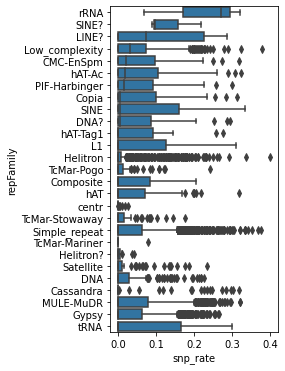

In [48]:
plt.figure(figsize=(3, 6))
sns.boxplot(
    data=repeats,
    y="repFamily",
    x="snp_rate",
    color="C0",
    order=repeats.groupby("repFamily").snp_rate.median().sort_values(ascending=False).index,
)

In [84]:
!ls ../vep/conservation

Ath_PhastCons.bedGraph.gz  Chr1.tsv.gz	Chr5.tsv.gz
Ath_PhyloP.bedGraph.gz	   Chr2.tsv.gz


In [2]:
conservation = pd.read_csv("../vep/conservation/Chr5.tsv.gz", sep="\t")
conservation["chrom"] = "Chr5"
conservation["start"] = conservation.pos
conservation["end"] = conservation.start + 1
conservation

,pos,PhastCons,PhyloP,chrom,start,end
0,73,0.137841,0.486723,Chr5,73,74
1,74,0.120058,0.630370,Chr5,74,75
2,75,0.082986,-0.672660,Chr5,75,76
3,76,0.083501,0.630370,Chr5,76,77
4,77,0.070315,0.410230,Chr5,77,78
...,...,...,...,...,...,...
24279498,26975493,0.149043,0.383414,Chr5,26975493,26975494
24279499,26975494,0.139126,0.383414,Chr5,26975494,26975495
24279500,26975495,0.121064,-0.819180,Chr5,26975495,26975496
24279501,26975496,0.144156,0.383414,Chr5,26975496,26975497


In [3]:
conservation = bf.merge(conservation)
conservation

,chrom,start,end,n_intervals
0,Chr5,73,636,563
1,Chr5,656,740,84
2,Chr5,741,1160,419
3,Chr5,1195,14933,13738
4,Chr5,14950,15043,93
...,...,...,...,...
12616,Chr5,26964381,26964611,230
12617,Chr5,26964616,26971022,6406
12618,Chr5,26971023,26971232,209
12619,Chr5,26971233,26974309,3076


In [6]:
undefined = pd.DataFrame({"chrom": ["Chr5"], "start": [0], "end": [26975502]})
undefined

,chrom,start,end
0,Chr5,0,26975502


In [8]:
undefined = bf.subtract(undefined, conservation)
undefined["length"] = undefined.end-undefined.start
undefined

,chrom,start,end,length
0,Chr5,0,73,73
1,Chr5,636,656,20
2,Chr5,740,741,1
3,Chr5,1160,1195,35
4,Chr5,14933,14950,17
...,...,...,...,...
12617,Chr5,26964611,26964616,5
12618,Chr5,26971022,26971023,1
12619,Chr5,26971232,26971233,1
12620,Chr5,26974309,26974311,2


<AxesSubplot:>

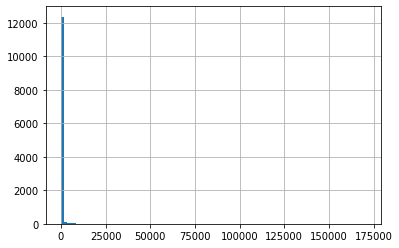

In [10]:
undefined.length.hist(bins=100)

In [11]:
undefined.sort_values("length")

,chrom,start,end,length
2492,Chr5,6471366,6471367,1
8831,Chr5,18177772,18177773,1
12514,Chr5,26667877,26667878,1
3634,Chr5,8839324,8839325,1
3633,Chr5,8837317,8837318,1
...,...,...,...,...
5030,Chr5,11228194,11266742,38548
5178,Chr5,12025873,12069026,43153
5159,Chr5,11685999,11738425,52426
6410,Chr5,14323417,14393607,70190


In [4]:
24279503 / 26975502  # should remove N's before this

0.9000575040271726

In [26]:
filtered = pd.read_csv("intervals/Arabidopsis_thaliana.tsv.gz", sep="\t")
filtered.chrom = "Chr" + filtered.chrom.astype(str)
filtered

,chrom,start,end
0,Chr1,0,17072
1,Chr1,18579,55738
2,Chr1,56513,180617
3,Chr1,180649,256172
4,Chr1,256590,257772
...,...,...,...
4072,Chr5,26259842,26290501
4073,Chr5,26290554,26483066
4074,Chr5,26485339,26787169
4075,Chr5,26787590,26891701


In [28]:
bf.select(filtered, "Chr1:14266972-15863338").head(50)

,chrom,start,end
423,Chr1,14282076,14296497
424,Chr1,14299778,14307098
425,Chr1,14307127,14308827
426,Chr1,14329740,14331068
427,Chr1,14332485,14334393
428,Chr1,14343872,14347022
429,Chr1,14348545,14355707
430,Chr1,14365830,14368443
431,Chr1,14377151,14379585
432,Chr1,14390162,14392675


In [31]:
filtered.length = filtered.end - filtered.start
filtered.length.sum()

104949816

<AxesSubplot:>

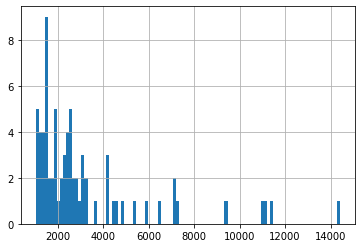

In [33]:
x = bf.select(filtered, "Chr1:14266972-15863338")
(x.end-x.start).hist(bins=100)

In [35]:
x["length"] = x.end-x.start
x.sort_values("length")

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,chrom,start,end,length
443,Chr1,14607736,14608775,1039
460,Chr1,15435253,15436316,1063
492,Chr1,15807399,15808541,1142
465,Chr1,15525341,15526488,1147
467,Chr1,15546145,15547309,1164
...,...,...,...,...
471,Chr1,15601279,15610692,9413
449,Chr1,14998787,15009767,10980
448,Chr1,14912793,14923994,11201
476,Chr1,15642993,15654436,11443


In [36]:
x.query("length >= 2048").sort_values("length")

,chrom,start,end,length
444,Chr1,14816557,14818660,2103
472,Chr1,15614122,15616308,2186
459,Chr1,15432942,15435132,2190
484,Chr1,15714974,15717242,2268
495,Chr1,15850097,15852438,2341
490,Chr1,15770673,15773047,2374
431,Chr1,14377151,14379585,2434
435,Chr1,14422804,14425238,2434
483,Chr1,15701567,15704022,2455
436,Chr1,14457058,14459564,2506
